# [6.4. Multiple Input and Multiple Output Channels](https://d2l.ai/chapter_convolutional-neural-networks/channels.html)


<img src='./images/conv_operation.png' width='800'/>

&emsp; <sub>  * Image Credit : https://www.kaggle.com/manmohan291/57-cnn-basics

In this example, the input array/image has 3 channels. We want the output to have 2 channels. <br> 
With a convolution kernel of size **3 x 3**, **how many parameters does this convolutional layer has ?** <br>
- **weight** parameters : **input_channels x output_channels x 3 x 3**
- **bias** parameters : **output_channels**
    
Why multiple output channels?
- So that we can capture multiple aspects of an image at each spatial location. <br> E.g. The 1st filter can learn to detect horizontal edge, and maybe the 2nd filter is learned to detect 45$^\circ$ edge.

In [1]:
# Let's count the number of parameters in a Conv2D layer in PyTorch

import torch
import torch.nn as nn

conv2d = nn.Conv2d(in_channels=3, out_channels=2, kernel_size=(3, 3), bias=True)

print('Weight parameter dimension : ', conv2d.weight.data.shape)
print('Bias parameter dimension : '  , conv2d.bias.data.shape)

Weight parameter dimension :  torch.Size([2, 3, 3, 3])
Bias parameter dimension :  torch.Size([2])


## 1 x 1 Convolutional Layer

<img src='./images/fig_6.4.2.png' width='800'/>

- Not like a typical convolutional layer, a 1×1 filter doesn't have a spatial extent to correlate adjacent pixels of the inputs. 


- The  1×1 convolutional layer is equivalent to the fully-connected layer, when applied on a per spatial pixel basis. Therefore, we can view it this way : the 1x1 convolution allows the model to **summarize the input feature maps** at each spatial location; the coefficients used in the weighted sum operation is stored in each of the 1x1 filter. 


- The **1x1 convolution** can be used to adjust the number of channels to control model model complexity. (Similar to **pooling** being used to reduce the width and height of an image.) 


# [6.5 Pooling](https://d2l.ai/chapter_convolutional-neural-networks/pooling.html)


### Properties 

- Two types of Pooling : **maximum pooling** and **average pooling**

- The pooling layer’s number of output channels is the same as the number of input channels.

- Pooling layer contains no parameters.

- Pooling layer combined with a stride > 1 can be used to reduce the spatial dimensions of the hidden representations. 


### Max v.s. Avg Pooling

- Max-Pooling : Maximized presence of the features from a feature map.

Max-pooling helps to extract the sharpest features on the image and the sharpest features are a best lower-level representation of the image.

- Avg-Pooling : Summarizes the average presence of features from a feature map. 

Avg-Pooling helps to extract the smooth features. 

- In practice, maximum pooling has been found to work better than average pooling for computer vision tasks.


### Purpose of Pooling

- Downsampling the feature maps / hidden representations.
- Pooling gives us some amount of translation invariance by mitigating the sensitivity of convolutional layers to location.
- To aggregate information -> Larger receptive fields for deeper layers in a network.
- Better robustness to noise.

Pooling layers summarizes the featured map so that the model would be more reliable and robust to irrelevant details, and be less sensitive to precisely positioned features.



#### Reference

- [Comprehensive Guide to Different Pooling Layers in Deep Learning](https://analyticsindiamag.com/comprehensive-guide-to-different-pooling-layers-in-deep-learning/)

- [A Theoretical Analysis of Feature Pooling in Visual Recognition (Boureau+10)](https://www.di.ens.fr/willow/pdfs/icml2010b.pdf)

# [6.6. Convolutional Neural Networks (LeNet)](https://d2l.ai/chapter_convolutional-neural-networks/lenet.html)

- **LeNet** was one of the earliest convolutional neural networks proposed by Yann LeCun at 1989 to identify handwritten digits. <br>
  Paper : [Backpropagation Applied to Handwritten Zip Code Recognition -- LeCun et al. 1989](https://ieeexplore.ieee.org/document/6795724)
  
  
- LeNet Architecture : <br>
  ConV -> Pool -> ConV -> Pool -> FC -> FC -> FC (-> Softmax)

<img src='./images/slide_LeNet.png' width='860'/>

- The basic units in **each convolutional block** are a **convolutional layer**, a **sigmoid activation function**, and a subsequent **average pooling** operation.


- **Flatten** the feature maps before passing into to the **fully connected layer**.


- In a CNN, convolutional layers are typically arranged so that they **gradually decrease the spatial resolution** of the representations, while **increasing the number of channels**.


- Total network parameters ~ 62k. Most of the parameters are coming from the fully connected layers. 


- The activation functions used back in 1990s is **sigmoid**, while modern CNNs uses **ReLU** in most of the time. Also **max-pooling** is a more common choice in modern CNNs, instead of the **avg-pooling** used here.

In [2]:
import torch
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.optim as optim

import matplotlib.pyplot as plt
plt.rc('font', size=16)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

### Define LeNet-5 in PyTorch

In [3]:
net = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5, padding=2), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(6, 16, kernel_size=5), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(16 * 5 * 5, 120), nn.Sigmoid(),
    nn.Linear(120, 84), nn.Sigmoid(),
    nn.Linear(84, 10))

net.to(device)

# count total network parameters
print('Total network parameters :', sum(param.numel() for param in net.parameters() if param.requires_grad))

Total network parameters : 61706


## Train LeNet-5 on fashionMNIST

### Data : prepare dataset and dataloader

In [4]:
fmnist_train = datasets.FashionMNIST(
    root="../../../data", train=True, transform=transforms.ToTensor(), download=True)
fmnist_test = datasets.FashionMNIST(
    root="../../../data", train=False, transform=transforms.ToTensor(), download=True)

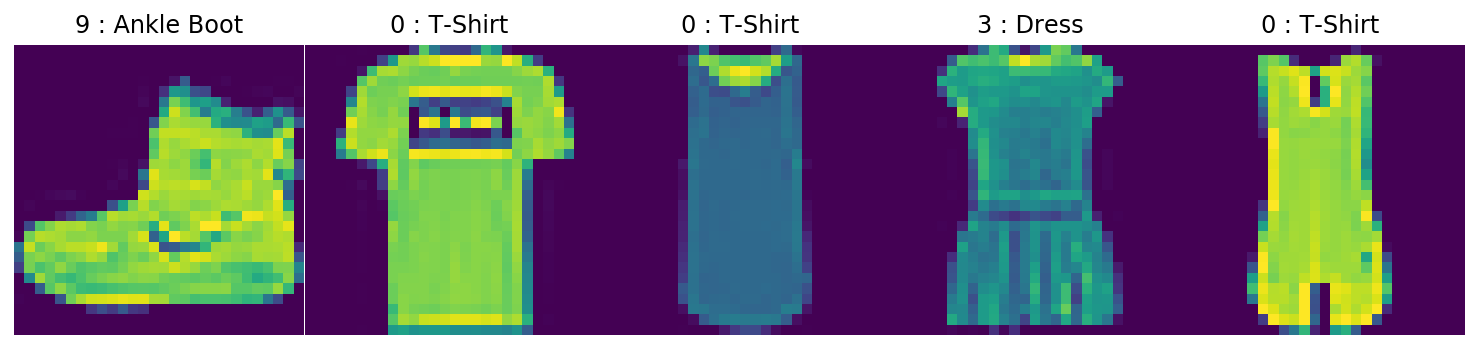

In [5]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

fig, axes = plt.subplots(1, 5, figsize=(13, 4))
plt.subplots_adjust(hspace=0.001, wspace=0.001)

for i in range(5):
    image, label = fmnist_train.__getitem__(i)
    axes[i].imshow(image.squeeze().numpy())
    axes[i].set_title(f'{label} : {labels_map[label]}')
    axes[i].axis('off')

In [6]:
batch_size = 100

train_loader = DataLoader(fmnist_train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(fmnist_test, batch_size=batch_size, shuffle=True)

### Loss function

**Careful!** <br>
`nn.CrossEntropyLoss` applies: ``nn.LogSoftmax`` and ``nn.NLLLoss`` (negative log likelihood loss). <br>
So don't apply softmax in the forward loop. <br>
``Y`` is class (digit) labels, not one-hot!   <br>
``Y_pred`` has raw scores (logits), no Softmax!

In [7]:
criterion = nn.CrossEntropyLoss()

### Optimization Function

In [8]:
learning_rate = 0.5

optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

### Training Loop

In [9]:
def train_1_epoch(model, optimizer, train_loss, train_acc):
    
    model.train()             # set model to training mode

    running_loss = 0.
    running_corrects = 0
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device) 
        labels = labels.to(device)
        
        # forward
        outputs = model(images)
        
        # loss
        loss = criterion(outputs, labels) # predicted outputs v.s. actual labels
        
        # backwards
        optimizer.zero_grad()  # zero gradient
        loss.backward()        # loss.backward would calculate dloss/dw_i  
        optimizer.step()       # update network parameters (w_i)
        
        # compute statistics (avg. loss, accuracy)
        running_loss += loss.item() * labels.size(0)
        _, predictions = torch.max(outputs, 1)
        running_corrects += torch.sum(predictions == labels.data)
        
        #if (i+1)%300 == 0: # every 300 steps, print something
        #    print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{len(train_loader)}, loss={loss.item():.4f}')
            
    epoch_loss = running_loss / len(fmnist_train)            ; train_loss.append(epoch_loss)
    epoch_acc  = running_corrects / len(fmnist_train) * 100. ; train_acc.append(epoch_acc)
    print(f'>>> End epoch {epoch+1}, train accuracy = {epoch_acc:.2f}%, train avgLoss = {epoch_loss:.4f}')

    
    
def validation(model, valid_loss, valid_acc):
    
    model.eval()              # set model to evaluation mode
    
    running_loss = 0.
    running_corrects = 0
    
    for i, (images, labels) in enumerate(test_loader):
        
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        loss = criterion(outputs, labels)
        
        # compute statistics (avg. loss, accuracy)
        running_loss += loss.item() * labels.size(0)
        _, predictions = torch.max(outputs, 1)
        running_corrects += torch.sum(predictions == labels.data)
    
    valid_loss.append(running_loss/len(test_loader.dataset))
    valid_acc.append(running_corrects/len(test_loader.dataset) * 100.)
    print(f'>>>              valid accuracy = {valid_acc[-1]:.2f}%, valid avgLoss = {valid_loss[-1]:.4f}')

In [10]:
train_loss = []
train_acc = []
valid_loss = []
valid_acc = []

num_epochs = 10
for epoch in range(0, num_epochs):
    train_1_epoch(net, optimizer, train_loss, train_acc)
    validation(net, valid_loss, valid_acc)

>>> End epoch 1, train accuracy = 10.03%, train avgLoss = 2.3122
>>>              valid accuracy = 10.00%, valid avgLoss = 2.3062
>>> End epoch 2, train accuracy = 9.76%, train avgLoss = 2.3050
>>>              valid accuracy = 10.00%, valid avgLoss = 2.3034
>>> End epoch 3, train accuracy = 9.82%, train avgLoss = 2.3041
>>>              valid accuracy = 10.00%, valid avgLoss = 2.3039
>>> End epoch 4, train accuracy = 10.48%, train avgLoss = 2.3026
>>>              valid accuracy = 10.00%, valid avgLoss = 2.2984
>>> End epoch 5, train accuracy = 29.97%, train avgLoss = 1.8273
>>>              valid accuracy = 50.66%, valid avgLoss = 1.1681
>>> End epoch 6, train accuracy = 60.36%, train avgLoss = 0.9871
>>>              valid accuracy = 57.21%, valid avgLoss = 0.9543
>>> End epoch 7, train accuracy = 68.60%, train avgLoss = 0.8046
>>>              valid accuracy = 68.34%, valid avgLoss = 0.7836
>>> End epoch 8, train accuracy = 73.35%, train avgLoss = 0.6904
>>>              valid accu

### Plots

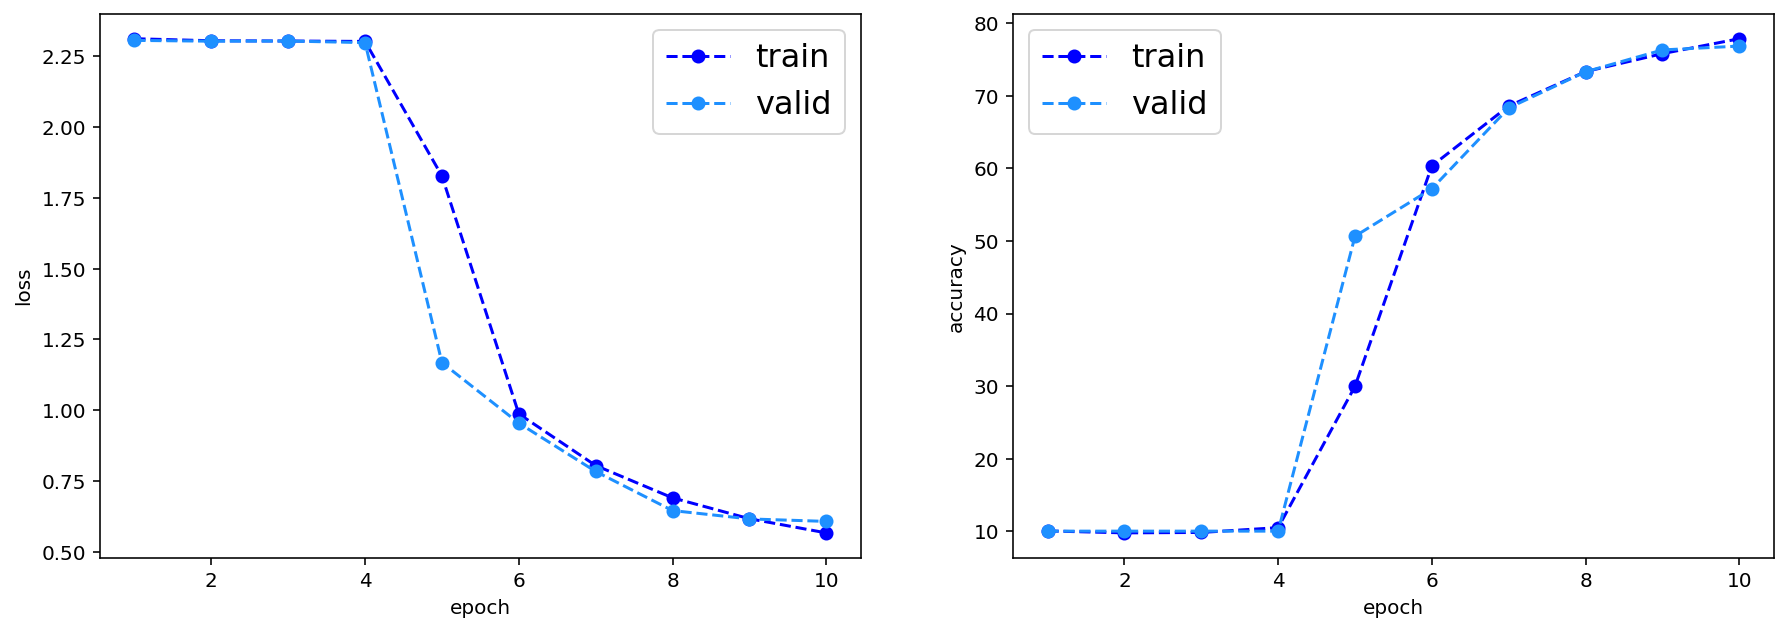

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.rc('font', size=16)

ax[0].plot(range(1,num_epochs+1)[::], train_loss[::], 'o--', label='train', color='b')
ax[0].plot(range(1,num_epochs+1)[::], valid_loss[::], 'o--', label='valid', color='dodgerblue')
ax[1].plot(range(1,num_epochs+1)[::], train_acc[::] , 'o--', label='train', color='b')
ax[1].plot(range(1,num_epochs+1)[::], valid_acc[::], 'o--', label='valid', color='dodgerblue')

ax[0].set_ylabel('loss')
ax[1].set_ylabel('accuracy')

for i in range(2):
    ax[i].set_xlabel('epoch')
    ax[i].legend(loc='best')